In [6]:
import pandas as pd

titanic = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
filtered = titanic[["PassengerId", "Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Embarked"]].fillna(0)
filtered = pd.get_dummies(filtered)
test = test[["PassengerId", "Pclass", "Sex", "Age", "SibSp", "Parch", "Embarked"]].fillna(0)
test = pd.get_dummies(test)

try:
    filtered = filtered.drop(columns=["Embarked_0"])
    test = test.drop(columns=["Embarked_0"])
except KeyError:
    pass

filtered.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,0,1,0,0,1
1,2,1,1,38.0,1,0,1,0,1,0,0
2,3,1,3,26.0,0,0,1,0,0,0,1
3,4,1,1,35.0,1,0,1,0,0,0,1
4,5,0,3,35.0,0,0,0,1,0,0,1


In [8]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = filtered.drop(columns="Survived")
y = filtered[["Survived"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,  random_state=11)

clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

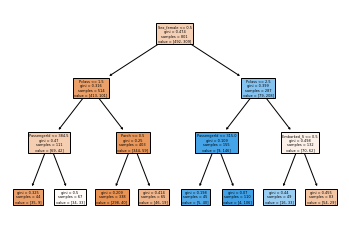

In [9]:
plt.figure()
tree.plot_tree(clf, filled=True, feature_names=X.columns)
plt.savefig("out/tree.jpeg", dpi=300)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56  1]
 [12 21]]
              precision    recall  f1-score   support

           0       0.82      0.98      0.90        57
           1       0.95      0.64      0.76        33

    accuracy                           0.86        90
   macro avg       0.89      0.81      0.83        90
weighted avg       0.87      0.86      0.85        90



In [11]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,0,1,0,1,0
1,893,3,47.0,1,0,1,0,0,0,1
2,894,2,62.0,0,0,0,1,0,1,0
3,895,3,27.0,0,0,0,1,0,0,1
4,896,3,22.0,1,1,1,0,0,0,1


In [12]:
test["Survived"] = clf.predict(test)
test.to_csv("out/submission.csv", index=False, columns=["PassengerId", "Survived"])